# Assignment - 1

In [33]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
def replace_missing(df):
    df["occupation"].replace(to_replace ="\?" , value = "Job_X", inplace = True, regex = True)
    df["workclass"].replace(to_replace="\?", value = "X", inplace = True, regex=True)
    df["native_country"].replace(to_replace = "\?", value = "United-States", inplace = True, regex = True)
    return df

In [35]:
def normalize(df):
    df["age"] = df[["age"]].apply(lambda x : (x - np.min(x))/(np.max(x) - np.min(x)))
    df["fnlwgt"] = df[["fnlwgt"]].apply(lambda x : (x - np.min(x)) / (np.max(x) - np.min(x)))
    df["hour_per_week"] = df[["hour_per_week"]].apply(lambda x : (x - np.min(x)) / (np.max(x)-np.min(x)))
    return df

In [36]:
def mdist(a,b,df_euc):                                      #mdist is the function to calculate euclidian distance with L2 norm
    total = 0;
    for i in range(0,len(df_euc.keys())):
        diff = b[i] - a[i];
        total += diff * diff;
    return np.sqrt(total)

In [37]:
def jaccardian_counts(vector_1,vector_2):
    M11 = 0
    M10 = 0
    M01 = 0
    for i in range(0,len(vector_1)):
        if(vector_1[i] == 1 and vector_2[i] == 1):
            M11 = M11 + 1
        if(vector_1[i] == 1 and vector_2[i] == 0):
            M10 = M10 + 1
        if(vector_1[i] == 0 and vector_2[i] == 1):
            M01 = M01 + 1
    return M11,M10,M01

def jaccardian_sim(labels,df_train,df_test):
    delta_k = []
    jacc_sim = []
    length = num_rows
    for j in range(0,length):
        for k in range(0,num_test_rows):
            vector_1 = []
            vector_2 = []
            for i in range(0,len(labels)):
                vector_1.append(df_train[labels[i]][j])
                vector_2.append(df_test[labels[i]][k])
            M11,M10,M01 = jaccardian_counts(vector_1,vector_2)
            delta_k.append(get_delta(vector_1,vector_2))
            if(M11+M10+M01 == 0):
                jacc_sim.append(0)
                continue
            jacc_sim.append(M11/(M10+M01+M11))
            
    ar = np.array(jacc_sim)
    shape = (length,num_test_rows)
    ar_reshape = ar.reshape(shape,)
    df_sim = pd.DataFrame(data = ar_reshape)
    
    ar = np.array(delta_k)
    shape = (length,num_test_rows)
    ar_reshape = ar.reshape(shape,)
    df_delta_k = pd.DataFrame(data = ar_reshape)
    return(df_sim,df_delta_k)

def get_norm(x):
    square_sum = 0
    for i in x:
        square_sum = square_sum + i * i
    return math.sqrt(square_sum)

def dot(v1, v2):
    sum_prod = 0
    for i in range(0,len(v1)):
        sum_prod = sum_prod + v1[i] * v2[i]
    return sum_prod

def cos_sim(a,b):
    dot_prod = dot(a,b)
    #print(dot_prod)
    a_norm = get_norm(a)
    b_norm = get_norm(b)
    #print(a_norm)
    if(a_norm == 0 or b_norm == 0):
        return 0
    return (dot_prod/(a_norm * b_norm))


def cosine_sim(labels):
    delta_k = []
    cosine_sim1 = []
    length = num_rows
    for j in range(0,length):
        for k in range(0,length):
            vector_1 = []
            vector_2 = []
            for i in range(0,len(labels)):
                vector_1.append(df[labels[i]][j])
                vector_2.append(df[labels[i]][k])
            cosine_sim1.append(cos_sim(vector_1,vector_2))
            delta_k.append(get_delta(vector_1,vector_2))
            
    ar = np.array(cosine_sim1)
    shape = (length,length)
    ar_reshape = ar.reshape(shape,)
    df_sim = pd.DataFrame(data = ar_reshape)
    
    ar = np.array(delta_k)
    shape = (length,length)
    ar_reshape = ar.reshape(shape,)
    df_delta_k = pd.DataFrame(data = ar_reshape)
    return(df_sim,df_delta_k)

### Delta:
* Given two vectors this function returns 0 if both vectors are zero vectors. Used for sparse data. Delta refers to variable delta in the general approach formula to calculate similarities.

In [38]:
def get_delta(vector_1,vector_2):
    for i in range(0,len(vector_1)):
        if(vector_1[i] == 1 or vector_2[i] == 1):
            return 1
    return 0

### Similarity function for Nominal and Ordinal:

In [39]:
def nom_sim(dframe_train,dframe_test):
    temp = []
    for i in dframe_train:
        for j in dframe_test:
            if i == j:
                a = 1
                temp.append(a)
            else:
                a = 0
                temp.append(a)        
    ar = np.array(temp)
    shape = (len(dframe_train), len(dframe_test))
    ar_reshape = ar.reshape(shape,)
    df_sim = pd.DataFrame(data = ar_reshape)
    return(df_sim)


def ord_sim(dframe_train,dframe_test):
    temp = []
    for i in dframe_train:
        i = i - 1
        for j in dframe_test:
            j = j - 1
            d = abs(i - j) / (len(dframe_train.unique()) - 1)
            s = temp.append(1-d)
    ar = np.array(temp)
    shape = (len(dframe_train), len(dframe_test))
    ar_reshape = ar.reshape(shape,)
    df_sim = pd.DataFrame(data = ar_reshape)
    return(df_sim)

### Average function :

* Combines similarities for different attribute types using general approach. delta_k here is the delta values of attributes for which jaccardian similarity is applied. 
* Loop iterates through all (except jaccardian) the data frames containing similarity values for which average similarity is to be calculated.
* The same is done with jaccardian, but if the two vectors are 0 (delta value for that element in df is 0) then it is not included in the average, delta_count makes sure of this.

In [40]:
def average_sim(df_list,delta_k):
    #print(num_test_rows)
    #print(delta_k)
    average = []
    length = num_rows
    for i in range(0,num_test_rows):
        for j in range(0,length):
#             if(i > 286):
#                 print(i,j,end=' ',flush=True)
            avg = 0
            delta_count = 0
            for k in range(0,len(df_list)-1):
                avg = avg + df_list[k][i][j]
                delta_count = delta_count + 1
            k = len(df_list)-1
            if(k == len(df_list)-1):
                avg = avg + df_list[k][i][j] * delta_k[i][j]
                if(delta_k[i][j] == 1):
                    delta_count = delta_count + 1
            avg = avg / (delta_count)
            average.append(avg)
    
    ar = np.array(average)
    shape = (length, num_test_rows)
    ar_reshape = ar.reshape(shape,)
    df_avg = pd.DataFrame(data = ar_reshape)
    return(df_avg)

* Replacing the values that are other than 0 in capital_gain and capital_loss with 1.
* This will help us to apply jaccard similarity.

In [41]:
def replace_positive_with_one(dframes,df):
    for i in range(0,len(dframes)):
        for j in range(0,len(df[dframes[i]])):
            if(df[dframes[i]][j] > 0):
                df[dframes[i]][j] = 1
    return df

In [42]:
def replace_diagnol(df_avg):
    for i in range(0,num_rows):
        df_avg[i][i] = 0
    return df_avg

In [43]:
def get_manhattan(df_train,df_test):
    temp = []
    for i in df_train:
        for j in df_test:
            temp.append(abs(i-j))
    ar = np.array(temp)
    shape = (num_rows,num_test_rows)
    ar_new = ar.reshape(shape,)                           
    ar_new.shape
    df_man = pd.DataFrame(data=ar_new)
    return df_man

In [44]:
def get_similarities(df_train,df_test):
    df_man_age = get_manhattan(df_train["age"],df_test["age"])
    df_man_fnlwgt = get_manhattan(df_train["fnlwgt"],df_test["fnlwgt"])
    df_man_hour_per_week = get_manhattan(df_train["hour_per_week"],df_test["hour_per_week"])
    df_train_euc = df_train[["age","fnlwgt","hour_per_week"]]
    df_test_euc = df_test[["age","fnlwgt","hour_per_week"]]
#     con_similarity=[]                                     #similarity for continuous variables age,fnlwgt
#     for i in df_train_euc.values:
#         for j in df_test_euc.values:
#             con_similarity.append(1/np.exp(mdist(i,j,df_train_euc)))   # Once we have the distance d, we can calculate the similarity by 1/e^d
#     ar = np.array(con_similarity)                         # This is the final array which consists of 270,400 values
#     shape = (num_rows,num_test_rows)
#     ar_new = ar.reshape(shape,)                           # Arranging the 1d array to 520 x 520 matrix
#     ar_new.shape
#     global df_mdist
#     df_mdist = pd.DataFrame(data=ar_new)                  # Loading these values into a dataframe
    replace_dframes = ["capital_loss","capital_gain"]
    df_train = replace_positive_with_one(replace_dframes,df_train)
    df_test = replace_positive_with_one(replace_dframes,df_test)
    df_jac_sim,df_delta_k = jaccardian_sim(replace_dframes,df_train,df_test)
    #print(df_jac_sim)
    df_gain = nom_sim(df_train["capital_gain"],df_test["capital_gain"])
    df_loss = nom_sim(df_train["capital_loss"],df_test["capital_loss"])
    df_edu_sim = ord_sim(df_train["education_cat"],df_test["education_cat"])
    df_occu_sim = nom_sim(df_train["occupation"],df_test["occupation"])
    df_race_sim = nom_sim(df_train["race"],df_test["race"])
    df_country_sim = nom_sim(df_train["native_country"],df_test["native_country"])
    df_marital_sim = nom_sim(df_train["marital_status"],df_test["marital_status"])
    df_gender_sim = nom_sim(df_train["gender"],df_test["gender"])
    df_relationship_sim = nom_sim(df_train["relationship"],df_test["relationship"])
    #print(df_mdist[288][56])
    df_list = [df_man_age,df_man_fnlwgt,df_man_hour_per_week,df_edu_sim,df_occu_sim,df_race_sim,df_country_sim,df_marital_sim,df_gender_sim,df_relationship_sim,df_jac_sim]
    #df_list = [df_man_age,df_man_fnlwgt,df_man_hour_per_week,df_gain,df_loss,df_edu_sim,df_occu_sim,df_race_sim,df_country_sim,df_marital_sim,df_gender_sim,df_relationship_sim]
    df_avg = average_sim(df_list,df_delta_k)
    #df_avg = replace_diagnol(df_avg)
    return df_avg

In [45]:
#df_mdist[287][510]

In [67]:
def main(training_file,test_file):
    global df_train
    df_train = pd.read_csv(training_file) #Reading the income_tr csv file into a dataframe df
    global df_test
    df_test = pd.read_csv(test_file)
    df_test.drop("ID",axis = 1, inplace=True)
    df_train.drop("ID",axis = 1, inplace=True)
#     df_combined = pd.concat([df_train,df_test],axis=0)
#     df_train = df_combined
#     df_test = df_combined
#     print(df_test)
    global num_rows
    num_rows = len(df_train.index)
    df_train = replace_missing(df_train)
    df_train = normalize(df_train)
    #df_avg = get_similarities(df_train)
    global num_test_rows
    num_test_rows = len(df_test.index)
    
    #df.describe() 
    df_test = replace_missing(df_test)
    df_test = normalize(df_test)
    df_avg = get_similarities(df_train,df_test)
# #df_prox = k_similar(df_avg,k)
# df_temp = pd.DataFrame({'Transaction ID':list(range(1,num_rows+1))})
# df_prox = pd.concat([df_temp,df_prox],axis=1)
# df_prox.to_csv("output.csv")
# df_prox.head()
    return df_avg

### Training and test files
Call the main function with training and test files.

In [47]:
training_file = "income_tr.csv"
test_file = "income_te.csv"
# #for cross validation
# training_file = "combined.csv"
# test_file = "combined.csv"
global df_avg
df_avg = main(training_file,test_file)
#df_avg = replace_diagnol(df_avg)
df_avg.head()

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
0,0.668298,0.548841,0.117392,0.203017,0.423687,0.419696,0.406820,0.404772,0.629734,0.569510,...,0.311380,0.327497,0.379056,0.473182,0.281337,0.297942,0.558482,0.423212,0.685411,0.380766
1,0.283002,0.613971,0.393692,0.581547,0.410065,0.308246,0.591623,0.632532,0.577006,0.389397,...,0.375191,0.346094,0.370268,0.354313,0.380923,0.370735,0.464506,0.250134,0.417576,0.308807
2,0.455018,0.253589,0.404294,0.579182,0.409847,0.418306,0.341105,0.571718,0.360739,0.590069,...,0.374445,0.311372,0.469892,0.327135,0.439139,0.433660,0.355206,0.431112,0.612328,0.375584
3,0.344231,0.425660,0.312762,0.328497,0.330477,0.311680,0.329921,0.337684,0.444968,0.461716,...,0.249790,0.621151,0.248666,0.352571,0.468298,0.570970,0.308753,0.376420,0.476321,0.368048
4,0.370962,0.572395,0.551499,0.209993,0.579580,0.559422,0.252835,0.529668,0.295677,0.131341,...,0.565031,0.336552,0.475055,0.556967,0.269474,0.562342,0.219937,0.345794,0.513664,0.310097


### Parameter "k" :
* Get k similar objects for each test object in the dataset. Get k largest elements and their indices using DataFrame.nlargest and DataFrame.nlargest.index function in each column. Each column represents one object/record in the test file. Use these k values and indices as the k-nearest indices.

In [49]:
def get_k_nearest(df_class,df_avg,train_indices,test_indices,k):
    #print(test_indices)
    #print(train_indices)
    df_train_avg = df_avg.iloc[train_indices]
    #print(df_train_avg)
    df_predicted_class = pd.DataFrame({"Predicted Class":[],"Posterior":[]})
    for i in test_indices:
        nearest_indices = df_train_avg.nlargest(k,i).index
        #print(nearest_indices)
        (predicted_class,posterior) = get_posterior_and_class(df_class,nearest_indices,0.5)
        #print(predicted_class,posterior)
        df_temp = pd.DataFrame({"Predicted Class":[predicted_class],"Posterior":[posterior]})
        df_predicted_class = pd.concat([df_predicted_class,df_temp],axis = 0)
    df_predicted_class = df_predicted_class.set_index(test_indices)
    #print(df_predicted_class)
    return df_predicted_class

In [68]:
def get_weighted_posterior_and_class(df_class,nearest_indices,df_avg):
    print("Weighted")

### Posteriror :


In [69]:
def get_posterior_and_class(df_class,nearest_indices,threshold):
    c1_count = 0 # <=50K
    c2_count = 0 # >50K
    for j in nearest_indices:
        if(df_class[j] == " <=50K"):
            #print("Found class: " + df_class[j])
            c1_count = c1_count + 1
            #print(c1_count)
        else:
            #print("Found class:" + df_class[j])
            c2_count = c2_count + 1
            #print(c2_count)
    #print(c1_count,c2_count,len(nearest_indices))
    posterior_c1 = c1_count/len(nearest_indices)
    posterior_c2 = c2_count/len(nearest_indices)
    if(posterior_c1 >= threshold):
        return (" <=50K",posterior_c1)
    else:
        return (" >50K",posterior_c2)

### Confusion Matrix

In [52]:
def get_confusion_matrix(df_output):
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0
    for i in df_output.index:
        if(df_output["Actual Class"][i] == " <=50K" and df_output["Predicted Class"][i] == " <=50K"):
            true_positive = true_positive + 1
        elif(df_output["Actual Class"][i] == " <=50K" and df_output["Predicted Class"][i] == " >50K"):
            false_negative = false_negative + 1
        elif(df_output["Actual Class"][i] == " >50K" and df_output["Predicted Class"][i] == " <=50K"):
            false_positive = false_positive + 1
        else:
            true_negative = true_negative + 1
    confusion_matrix = [[true_positive,false_negative],[false_positive,true_negative]]
    return confusion_matrix

In [53]:
def get_classification_accuracy(df_output,num_rows):
    accuracy = 0
    mse = 0
    for i in df_output.index:
        if(df_output["Actual Class"][i] == df_output["Predicted Class"][i]):
            accuracy = accuracy + 1
        else:
            mse = mse + 1
    accuracy = accuracy * 100/num_rows
    mse = mse * 100/num_rows
    return (accuracy,mse)

### knn with cross validation

In [54]:
def knn_main(cv,k,df_avg):
    df_avg = df_avg.sample(frac=1)
    indices = df_avg.index
    #pint(indices)
    i = 0;
    df_temp = pd.DataFrame({"Predicted Class":[],"Posterior":[]})
    while i != num_rows:
        test_indices = indices[i:i+cv]
        train_indices = list(range(0,i)) + list(range(i+cv,num_rows))
        i = i + cv
        df_predicted_class = get_k_nearest(df_train["class"],df_avg,train_indices,test_indices,k)
        df_temp = pd.concat([df_temp,df_predicted_class])
    df_temp = df_temp.sort_index(axis=0)
    df_class = df_train["class"]
    df_actual_class = pd.DataFrame({"Actual Class":df_class})
    df_temp = pd.concat([df_actual_class,df_temp],axis=1)
    return df_temp

In [55]:
def get_k_nearest_2(df_class,df_avg,k,threshold):
    df_predicted_class = pd.DataFrame({"Predicted Class":[],"Posterior":[]})
    for i in df_avg.columns:
        nearest_indices = df_avg.nlargest(k,i).index
        #print(nearest_indices)
        (predicted_class,posterior) = get_posterior_and_class(df_class,nearest_indices,threshold)
        #print(predicted_class,posterior)
        df_temp = pd.DataFrame({"Predicted Class":[predicted_class],"Posterior":[posterior]})
        df_predicted_class = pd.concat([df_predicted_class,df_temp],axis = 0) 
    test_indices = list(range(0,num_test_rows))
    df_predicted_class = df_predicted_class.set_index([test_indices])
    return df_predicted_class

### knn without cross validation

In [56]:
def knn_main2(k,df_avg,threshold):
    df_temp = pd.DataFrame({"Predicted Class":[],"Posterior":[]})
    #df_temp = pd.DataFrame({"Predicted Class":[],"Posterior":[]})
    df_temp = get_k_nearest_2(df_train["class"],df_avg,k,threshold)
    #print(df_temp)
    df_class = df_test["class"]
    #print(df_class)
    df_actual_class = pd.DataFrame({"Actual Class":df_class})
    df_temp = pd.concat([df_actual_class,df_temp],axis=1)
    return df_temp

In [66]:
cv = 8
k = list(range(7,8,2))
acc = []
TP_rate = []
FP_rate = []
TN_rate = []
FN_rate = []
F_measure = []

#ROC :

# k = 7
# df_temp = knn_main2(k,df_avg,0.5)
# k = np.unique(df_temp["Posterior"])
# k = sorted(k,reverse=True)

maximum = 0
for i in k:
    #print(i,end = " ")
    #df_temp = knn_main(cv,i,df_avg) # for cross validation
    df_temp = knn_main2(i,df_avg,0.5)
    
    #Roc
    #df_temp = knn_main2(7,df_avg,i)
    
    df_temp.to_csv("knn_output.csv")
    
    conf_matrix = get_confusion_matrix(df_temp)
    (accuracy,mse) = get_classification_accuracy(df_temp,num_test_rows)
    acc.append(accuracy)
    TP_rate.append(conf_matrix[0][0]/(conf_matrix[0][0]+conf_matrix[0][1]))
    FP_rate.append(conf_matrix[1][0]/(conf_matrix[1][0]+conf_matrix[1][1]))
    TN_rate.append(conf_matrix[1][1]/(conf_matrix[1][0]+conf_matrix[1][1]))
    FN_rate.append(conf_matrix[0][1]/(conf_matrix[0][0]+conf_matrix[0][1]))
    F_measure.append(2*conf_matrix[0][0]/(2*conf_matrix[0][0]+conf_matrix[0][1]+conf_matrix[1][0]))
    
    print(conf_matrix)
    print(i,accuracy,mse)
class_ratio = [x / 100 for x in acc]
#df_avg.head()

[[184, 37], [54, 13]]
1 68.40277777777777 31.59722222222222
[[218, 3], [66, 1]]
2 76.04166666666667 23.958333333333332
[[205, 16], [61, 6]]
3 73.26388888888889 26.73611111111111
[[219, 2], [66, 1]]
4 76.38888888888889 23.61111111111111
[[211, 10], [61, 6]]
5 75.34722222222223 24.65277777777778
[[220, 1], [65, 2]]
6 77.08333333333333 22.916666666666668
[[220, 1], [63, 4]]
7 77.77777777777777 22.22222222222222
[[220, 1], [66, 1]]
8 76.73611111111111 23.26388888888889
[[220, 1], [65, 2]]
9 77.08333333333333 22.916666666666668
[[220, 1], [66, 1]]
10 76.73611111111111 23.26388888888889
[[219, 2], [65, 2]]
11 76.73611111111111 23.26388888888889
[[220, 1], [67, 0]]
12 76.38888888888889 23.61111111111111
[[220, 1], [66, 1]]
13 76.73611111111111 23.26388888888889
[[221, 0], [67, 0]]
14 76.73611111111111 23.26388888888889
[[220, 1], [67, 0]]
15 76.38888888888889 23.61111111111111
[[221, 0], [67, 0]]
16 76.73611111111111 23.26388888888889
[[221, 0], [66, 1]]
17 77.08333333333333 22.91666666666666

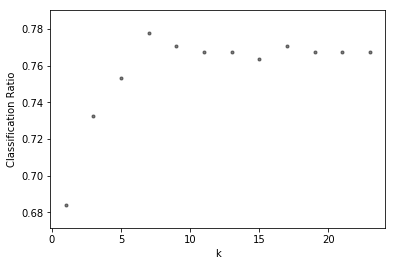

In [58]:
colors = (0,0,0)
area = np.pi*3
plt.scatter(k, class_ratio, s=area, c=colors, alpha=0.5)
plt.xlabel('k')
plt.ylabel('Classification Ratio')

### ROC curve

In [59]:
# x = [0]
# i = 0
# while(x[i] < 1):
#     x.append(x[i]+0.02)
#     i = i + 1
# plt.step(FP_rate, TP_rate, 'r-', x, x, 'b-')
# plt.xlabel('False Poitive Rate')
# plt.ylabel('True Positive Rate')
# #plt.axis([0.0,1.0,0.6,1.0])
# plt.show()

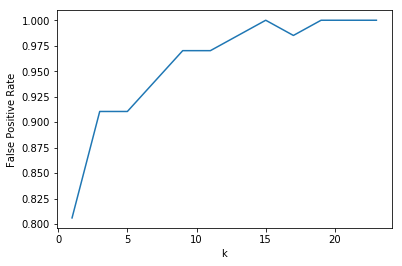

In [60]:
plt.plot(k,FP_rate)
plt.xlabel('k')
plt.ylabel('False Positive Rate')
plt.show()

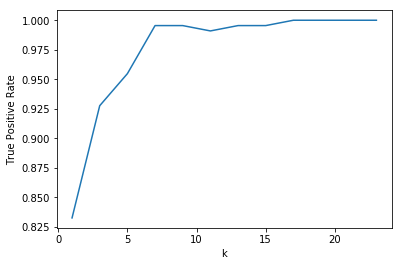

In [61]:
plt.plot(k,TP_rate)
plt.xlabel('k')
plt.ylabel('True Positive Rate')
plt.show()

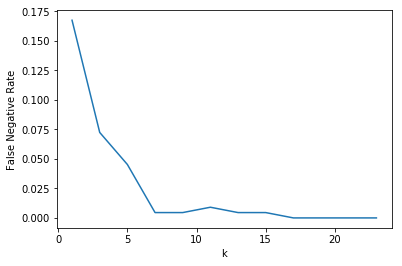

In [62]:
plt.plot(k,FN_rate)
plt.xlabel('k')
plt.ylabel('False Negative Rate')
plt.show()

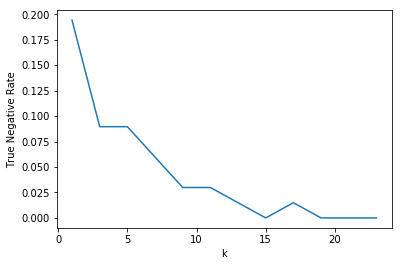

In [63]:
plt.plot(k,TN_rate)
plt.xlabel('k')
plt.ylabel('True Negative Rate')
plt.show()

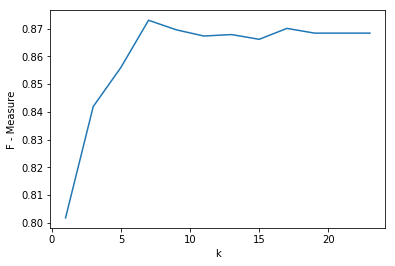

In [64]:
plt.plot(k,F_measure)
plt.xlabel('k')
plt.ylabel('F - Measure')
plt.show()